In [3]:
import pandas as pd

path = r"UHT milk P036.csv"
 
df = pd.read_csv(path)
df


,Protein Group,Protein ID,Protein Accession,Peptide,Unique,-10lgP,Mass,Length,ppm,m/z,...,#Feature,#Feature Sample 1,#Feature Sample 2,#Feature Sample 3,#Feature Sample 4,Start,End,PTM,AScore,Found By
0,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLPLLQSWMHQPHQPLPPTVMF...,Y,76.82,6358.2485,56,-1.7,1272.6473,...,20,6,5,3,6,129,184,NaN,NaN,PEAKS DB
1,3,10,P02666,R.DMPIQAFLLYQEPVLGPVRGPFPIIV,Y,75.16,2908.5923,26,-2.9,1455.2933,...,12,3,4,2,3,199,224,NaN,NaN,PEAKS DB
2,3,10,P02666,R.DM(+15.99)PIQAFLLYQEPVLGPVRGPFPIIV,Y,70.64,2924.5874,26,-3.3,1463.2902,...,8,2,2,2,2,199,224,Oxidation (M),M2:Oxidation (M):1000.00,PEAKS DB
3,3,10,P02666,S.QSLTLTDVENLHLPLPLLQSWMHQPHQPLPPTVMFPPQSVLSLS...,Y,70.17,5308.7778,47,-1.4,1328.1945,...,5,2,1,1,1,138,184,NaN,NaN,PEAKS DB
4,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLP.L,Y,69.89,2838.4326,25,-2.1,1420.2148,...,12,4,2,2,4,129,153,NaN,NaN,PEAKS DB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,104,132,A5D9E6,E.TSK(-18.01)GDQLSK.S,Y,25.37,944.4927,9,-9.2,473.2478,...,1,0,0,0,1,151,159,lal,K3:lal:0.00,PEAKS DB
5373,87,123,A7E3W7,M.QAS(-18.01)LDLGTD.K,Y,25.25,900.4189,9,4.5,901.4262,...,1,0,0,1,0,162,170,lal,S3:lal:1000.00,PEAKS DB
5374,86,128,E1BLY0,E.GS(-18.01)K(-18.01)AAGG.G,Y,25.05,510.2550,7,-5.1,511.2567,...,1,1,0,0,0,646,652,lal,S2:lal:1000.00;K3:lal:1000.00,PEAKS DB
5375,91,130,A5D9D1,G.S(-18.01)GIYAPHSP.K,Y,24.64,909.4344,9,10.1,910.4456,...,1,1,0,0,0,224,232,lal,S1:lal:15.21,PEAKS DB


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: name 'np' is not defined

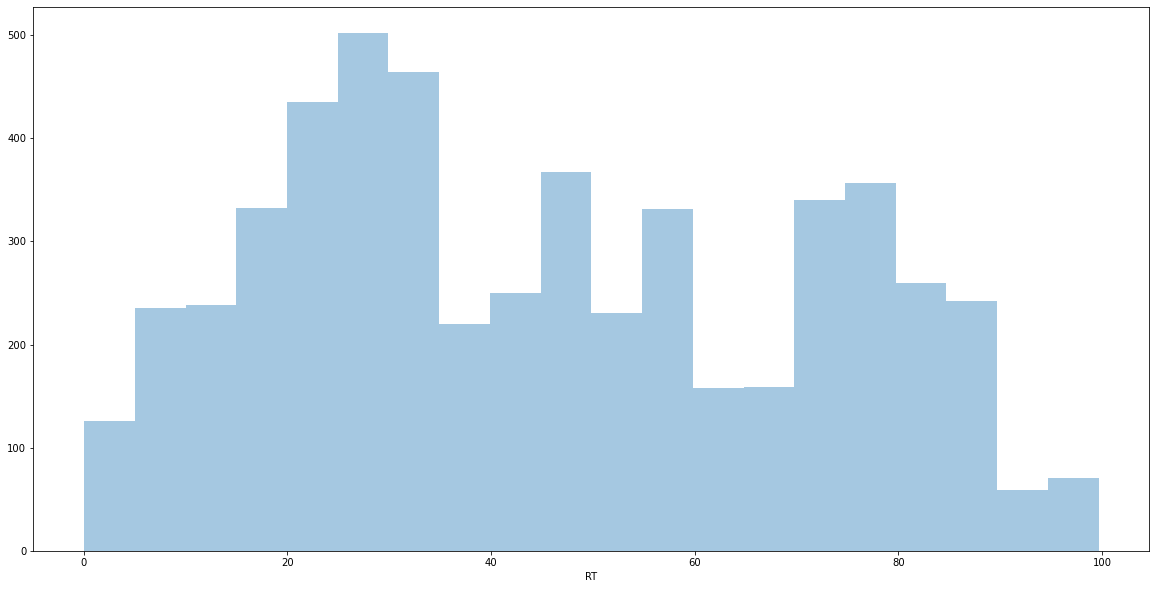

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(20,10))
#sns.distplot(df['RT'], kde=False, hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0})
sns.distplot(df['RT'], kde=False)
(n, bins) = np.histogram(df['RT'])
plt.title(f"Histogram over RT distribution with {len(n)} bins")
plt.xlabel('Retention time (RT)')
plt.ylabel('Frequency')

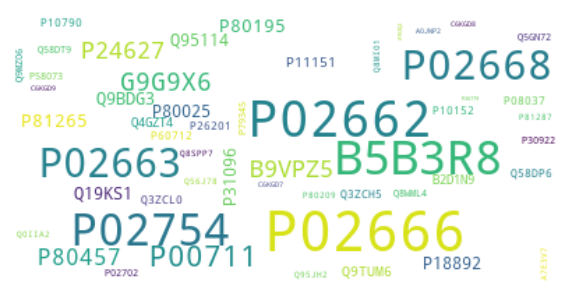

In [5]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

proteins = df["Protein Accession"]
proteinsText = ""
differentProteins = []

for x in proteins:
    x = x.strip()
    proteinsText = proteinsText+" "+ x
    if x not in differentProteins:
        differentProteins.append(x)
proteinsFrequency = []
for x in differentProteins:
    freq = proteinsText.count(x)
    proteinsFrequency.append(freq)
wordcloud = WordCloud(max_font_size=40, max_words=100, background_color="white", collocations=False).generate(proteinsText)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [6]:
import numpy as np
def count_no_of_modifications(ptm_str):
    #check if NaN value
    if pd.isnull(ptm_str):
        return 0
    return 1 + ptm_str.count(';')

#apply count_no_of_modifications to each PTM column
df['#modifications'] = df['PTM'].apply(count_no_of_modifications)
#print non zero values in modifcations column
df[df['#modifications'] > 0]

,Protein Group,Protein ID,Protein Accession,Peptide,Unique,-10lgP,Mass,Length,ppm,m/z,...,#Feature Sample 1,#Feature Sample 2,#Feature Sample 3,#Feature Sample 4,Start,End,PTM,AScore,Found By,#modifications
2,3,10,P02666,R.DM(+15.99)PIQAFLLYQEPVLGPVRGPFPIIV,Y,70.64,2924.5874,26,-3.3,1463.2902,...,2,2,2,2,199,224,Oxidation (M),M2:Oxidation (M):1000.00,PEAKS DB,1
5,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLPLLQ(+.98)S(-18.01)W...,Y,69.56,6357.2168,56,8.7,1272.4542,...,2,0,1,1,129,184,Deamidation (NQ); lal; Oxidation (M),Q28:Deamidation (NQ):10.19;S29:lal:71.89;M31:O...,PEAKS DB,3
8,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLPLLQSWM(+15.99)HQPHQ...,Y,65.11,6374.2437,56,2.4,1275.8551,...,2,3,0,1,129,184,Oxidation (M),M31:Oxidation (M):111.64,PEAKS DB,1
9,3,10,P02666,A.RELEELNVPGEIVESLS(+79.97)S(+79.97)S(+79.97)E...,Y,64.46,3041.2920,25,-2.1,1521.6434,...,2,2,3,1,16,40,Phosphorylation (STY),S17:Phosphorylation (STY):30.83;S18:Phosphoryl...,PEAKS DB,1
11,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLPLLQSWMHQ(+.98)PHQPL...,Y,63.57,6359.2324,56,0.2,1272.8501,...,0,0,1,0,129,184,Deamidation (NQ),Q33:Deamidation (NQ):10.19,PEAKS DB,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,104,132,A5D9E6,E.TSK(-18.01)GDQLSK.S,Y,25.37,944.4927,9,-9.2,473.2478,...,0,0,0,1,151,159,lal,K3:lal:0.00,PEAKS DB,1
5373,87,123,A7E3W7,M.QAS(-18.01)LDLGTD.K,Y,25.25,900.4189,9,4.5,901.4262,...,0,0,1,0,162,170,lal,S3:lal:1000.00,PEAKS DB,1
5374,86,128,E1BLY0,E.GS(-18.01)K(-18.01)AAGG.G,Y,25.05,510.2550,7,-5.1,511.2567,...,1,0,0,0,646,652,lal,S2:lal:1000.00;K3:lal:1000.00,PEAKS DB,1
5375,91,130,A5D9D1,G.S(-18.01)GIYAPHSP.K,Y,24.64,909.4344,9,10.1,910.4456,...,1,0,0,0,224,232,lal,S1:lal:15.21,PEAKS DB,1


Text(0, 0.5, 'Count')

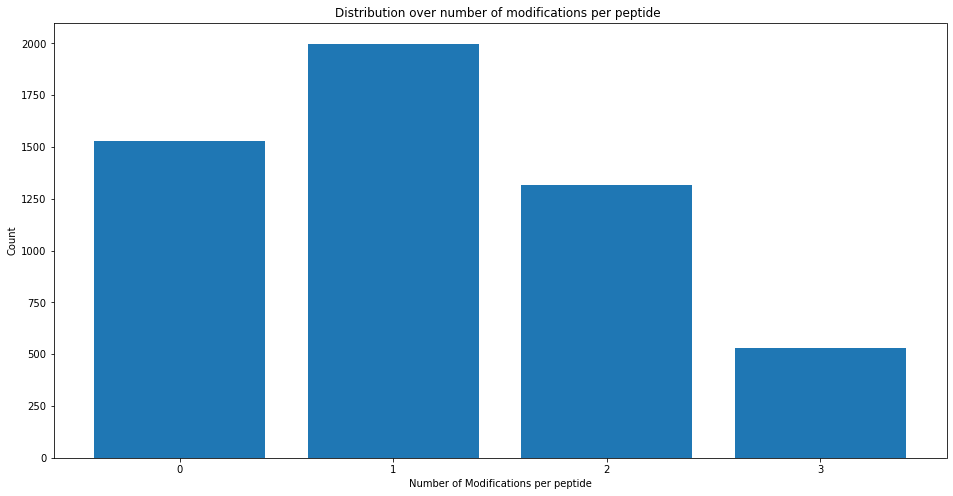

In [7]:

#Column chart (a.k.a. Bar Chart) showing distribution of modifications per peptide
plt.figure(figsize=(16,8))
plt.bar(df['#modifications'].value_counts().index, df['#modifications'].value_counts())
plt.xticks(np.arange(0,4))
plt.title("Distribution over number of modifications per peptide ")
plt.xlabel('Number of Modifications per peptide')
plt.ylabel('Count')

<AxesSubplot:xlabel='#modifications', ylabel='Mass'>

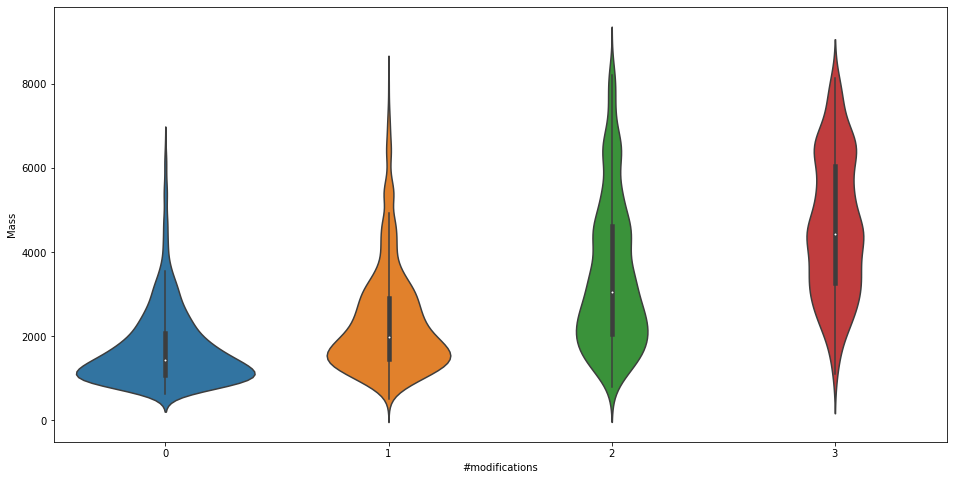

In [8]:
#violin plot showing distribution of number of modifications per peptide vs Mass
plt.figure(figsize=(16,8))
#sns.swarmplot(x='#modifications', y='Mass', data=df )
sns.violinplot(x='#modifications', y='Mass', data=df )

<AxesSubplot:xlabel='#modifications', ylabel='Length'>

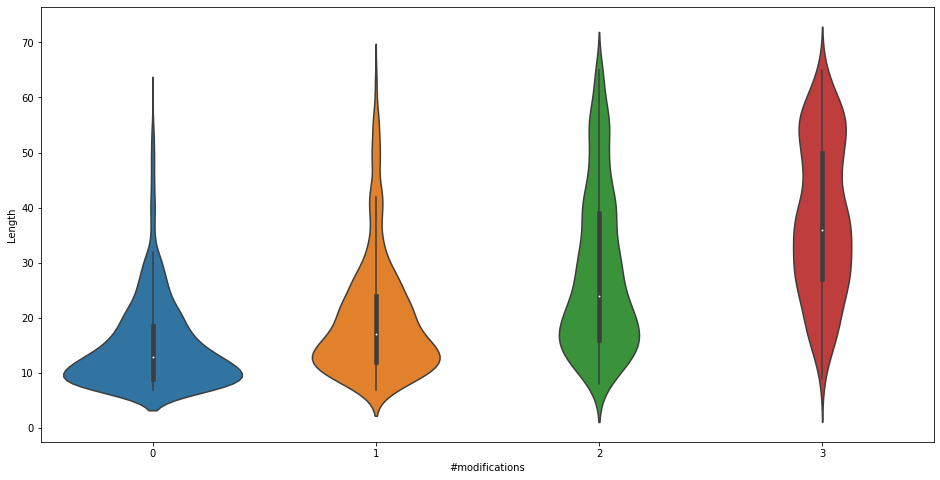

In [9]:
#violin plot showing distribution of number of modifications per peptide vs Length
plt.figure(figsize=(16,8))
sns.violinplot(x='#modifications', y='Length', data=df )


<AxesSubplot:xlabel='#modifications', ylabel='mass/len'>

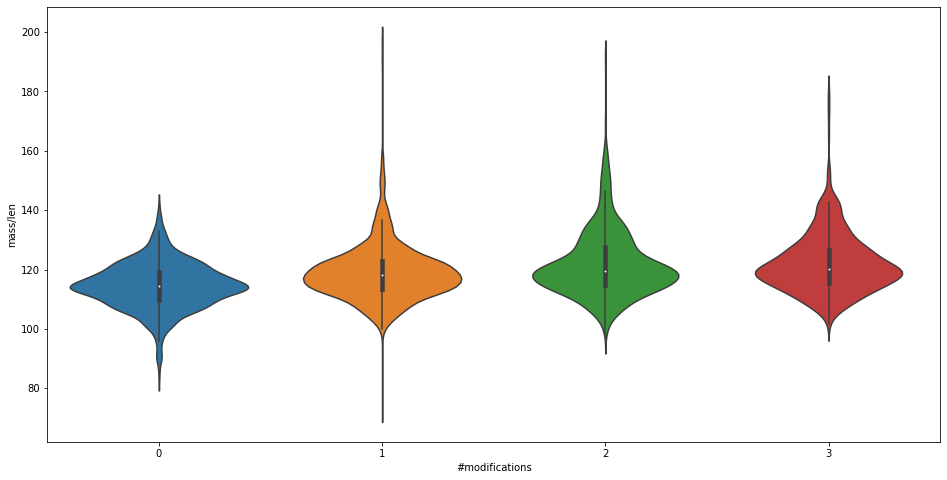

In [10]:
#create new column
df['mass/len']= df['Mass']/df['Length']

#violin plot showing distribution of number of modifications per peptide vs Mass/Length
plt.figure(figsize=(16,8))
sns.violinplot(x='#modifications', y='mass/len', data=df )


<AxesSubplot:xlabel='#modifications', ylabel='mass/len'>

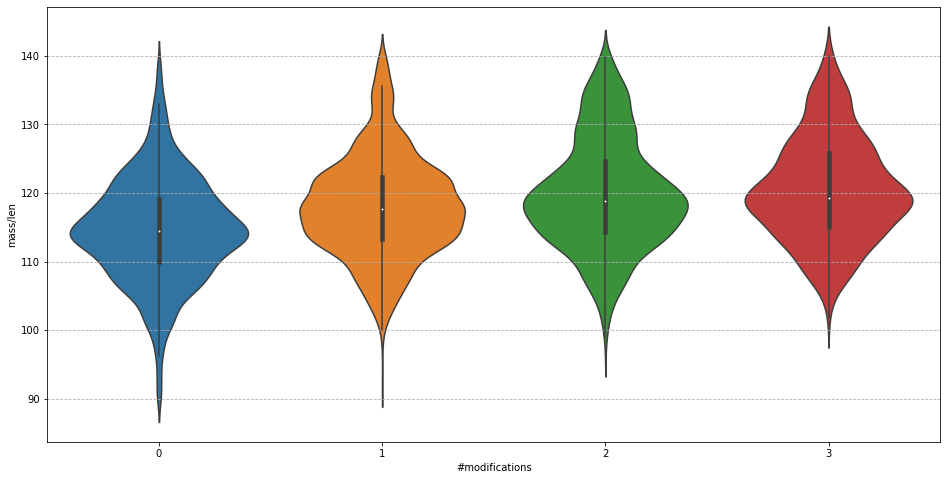

In [11]:
#create new column
df_short_mass = df[df['mass/len'] > 90]
df_short_mass = df_short_mass[df_short_mass['mass/len'] < 140]

#violin plot showing distribution of number of modifications per peptide vs Mass/Length
plt.figure(figsize=(16,8))
plt.grid( linestyle='--')
sns.violinplot(x='#modifications', y='mass/len', data=df_short_mass )


<AxesSubplot:xlabel='Mass', ylabel='-10lgP'>

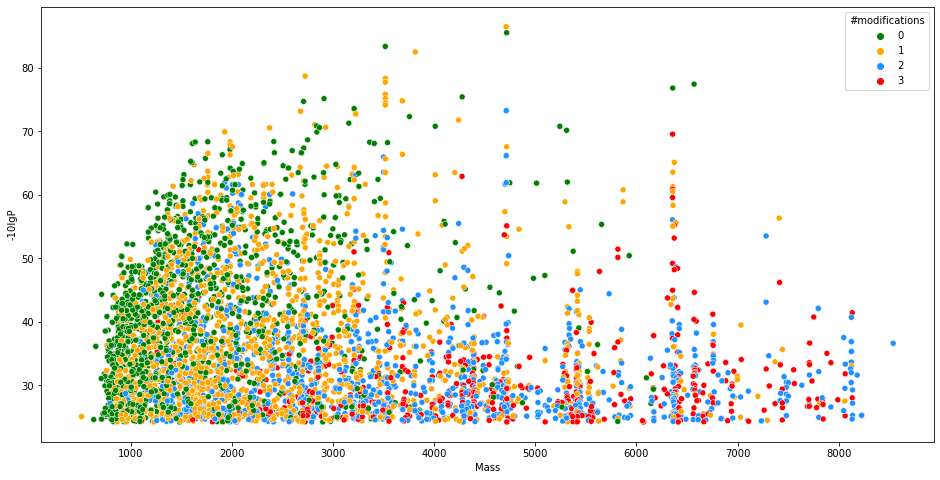

In [12]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='Mass', y='-10lgP', data=df ,hue='#modifications', palette = ['green','orange','dodgerblue','red'], legend='full')

<AxesSubplot:xlabel='None-#modifications', ylabel='Length'>

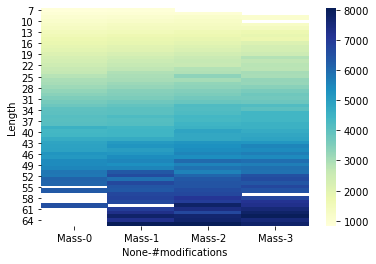

In [13]:
# _len = df['Length'].to_numpy()
# _mass = df['Mass'].to_numpy()
# _mods = df['#modifications'].to_numpy()
piv = pd.pivot_table(df, index=['Length'], columns=['#modifications'], values=['Mass'], aggfunc=np.mean)
sns.heatmap(piv, fmt="g", cmap="YlGnBu")

<AxesSubplot:xlabel='RT'>

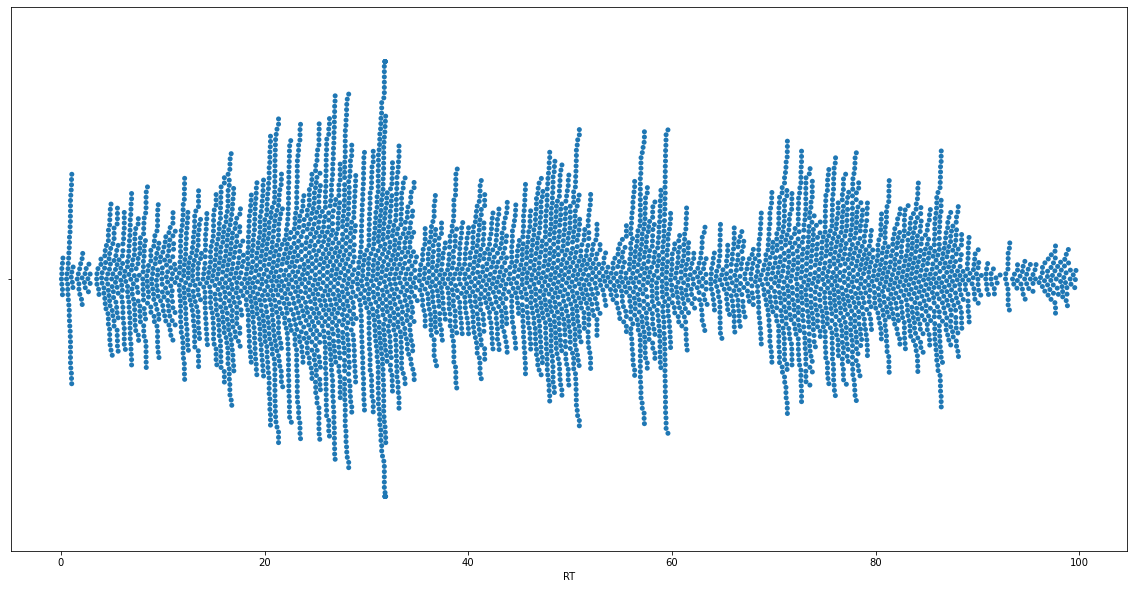

In [14]:
# Count Plot (a.k.a. Bar Plot)
plt.figure(figsize=(20,10))
sns.swarmplot(x='RT', data=df)


<AxesSubplot:xlabel='#modifications', ylabel='RT'>

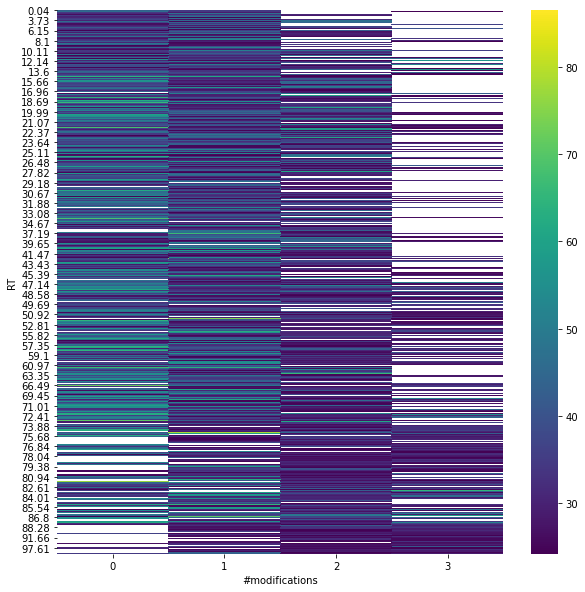

In [15]:
piv = pd.pivot_table(df, values='-10lgP', index='RT', columns='#modifications')
plt.figure(figsize=(10,10))
sns.heatmap(piv, cmap='viridis')

<AxesSubplot:xlabel='RT'>

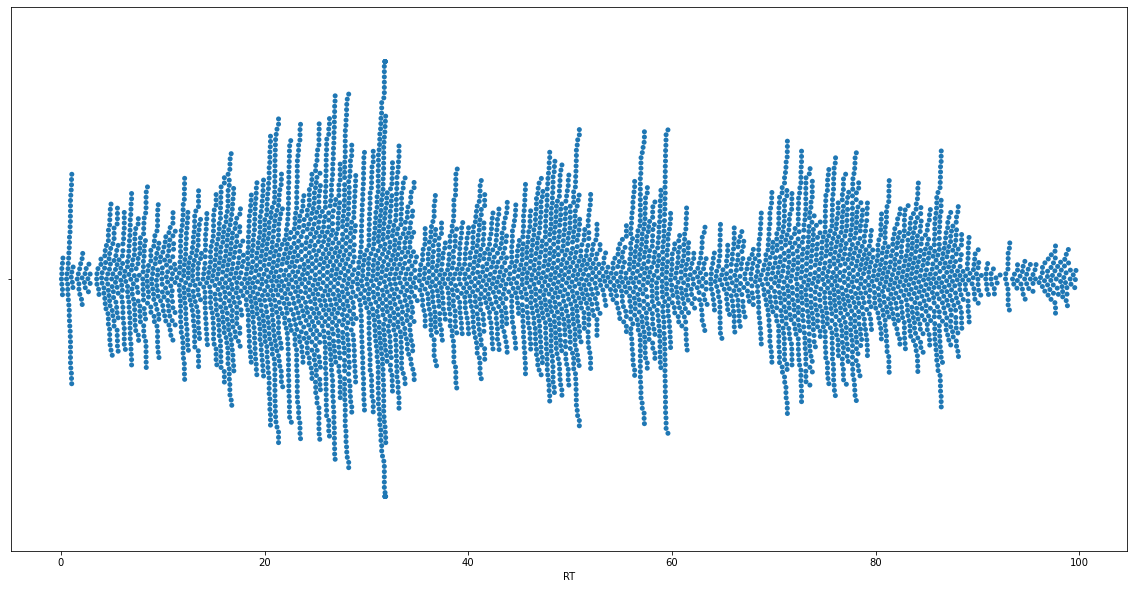

In [16]:
# Count Plot (a.k.a. Bar Plot) #BEFORE adding modifications
plt.figure(figsize=(20,10))
sns.swarmplot(x='RT', data=df)

Index(['Protein Group', 'Protein Accession', 'Peptide', '-10lgP', 'Mass',
       'Length', 'ppm', 'z', 'RT', 'Area Sample 1', 'Area Sample 2',
       'Area Sample 3', 'Area Sample 4', 'Fraction', '#Feature',
       '#Feature Sample 1', '#Feature Sample 2', '#Feature Sample 3',
       '#Feature Sample 4', 'Start', 'End', 'PTM', 'AScore'],
      dtype='object')
Index(['Protein Group', 'Protein Accession', 'Peptide', '-10lgP', 'Mass',
       'Length', 'ppm', 'z', 'RT', 'Area Sample 1', 'Area Sample 2',
       'Area Sample 3', 'Area Sample 4', 'Fraction', '#Feature',
       '#Feature Sample 1', '#Feature Sample 2', '#Feature Sample 3',
       '#Feature Sample 4', 'Start', 'End', 'PTM', 'AScore'],
      dtype='object')


<AxesSubplot:>

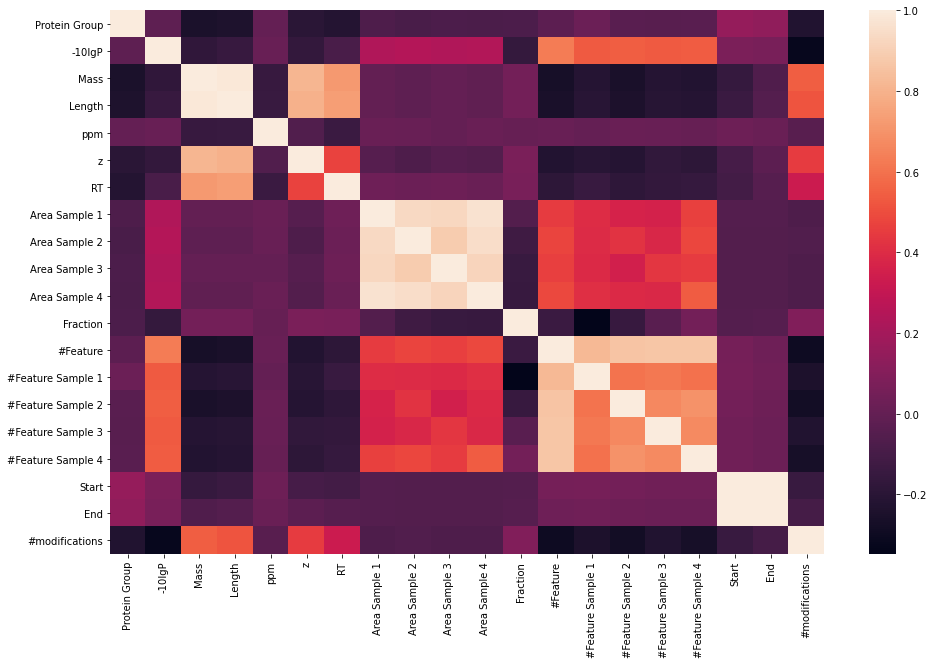

In [17]:
from utils import get_data_and_remove_unwanted_columns

df_modific = df[df['#modifications'] > 0]
df_unwanted = get_data_and_remove_unwanted_columns()
df_unwanted['#modifications'] = df_unwanted['PTM'].apply(count_no_of_modifications)
plt.figure(figsize=(16,10))
sns.heatmap(df_unwanted.corr())

<AxesSubplot:>

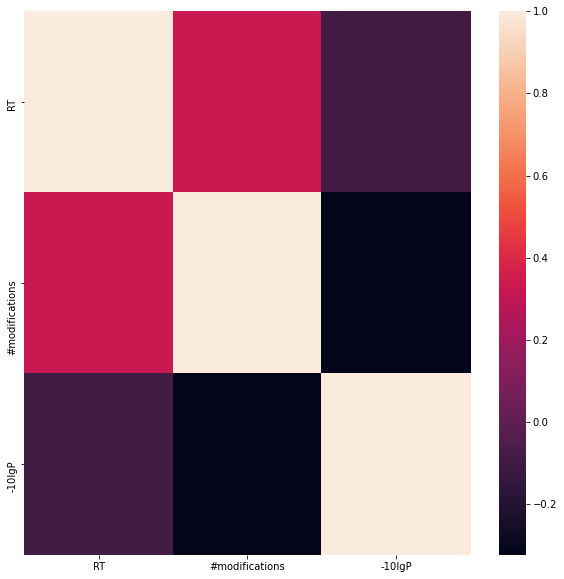

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df_unwanted[['RT','#modifications','-10lgP']].corr())

<AxesSubplot:xlabel='RT', ylabel='-10lgP'>

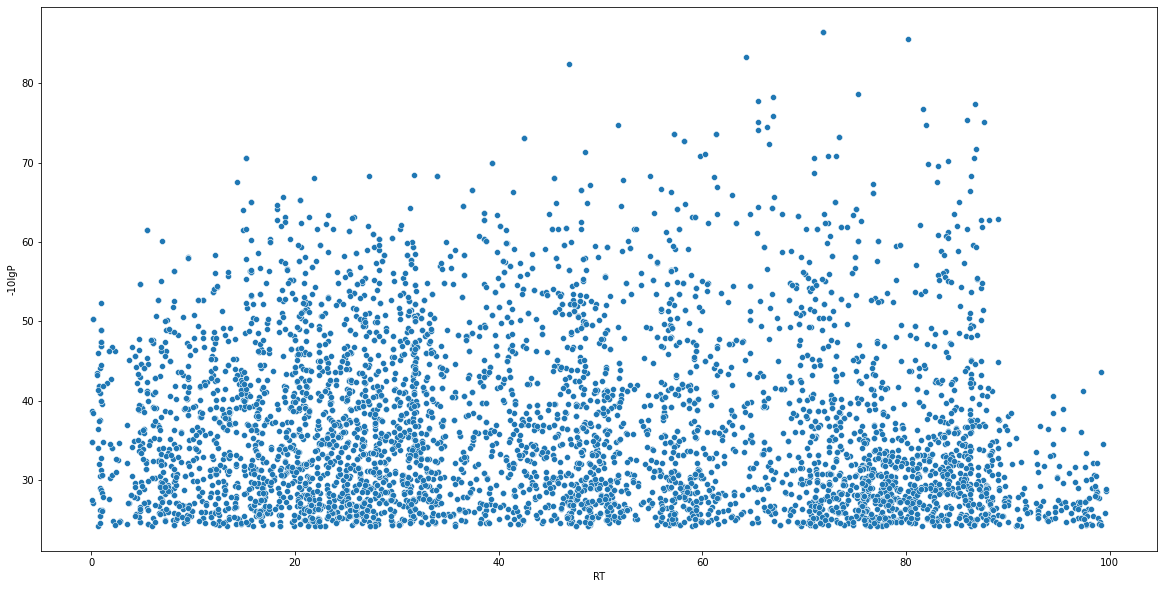

In [19]:
plt.figure(figsize=(20,10))
sns.scatterplot(y="-10lgP", x="RT", data=df)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


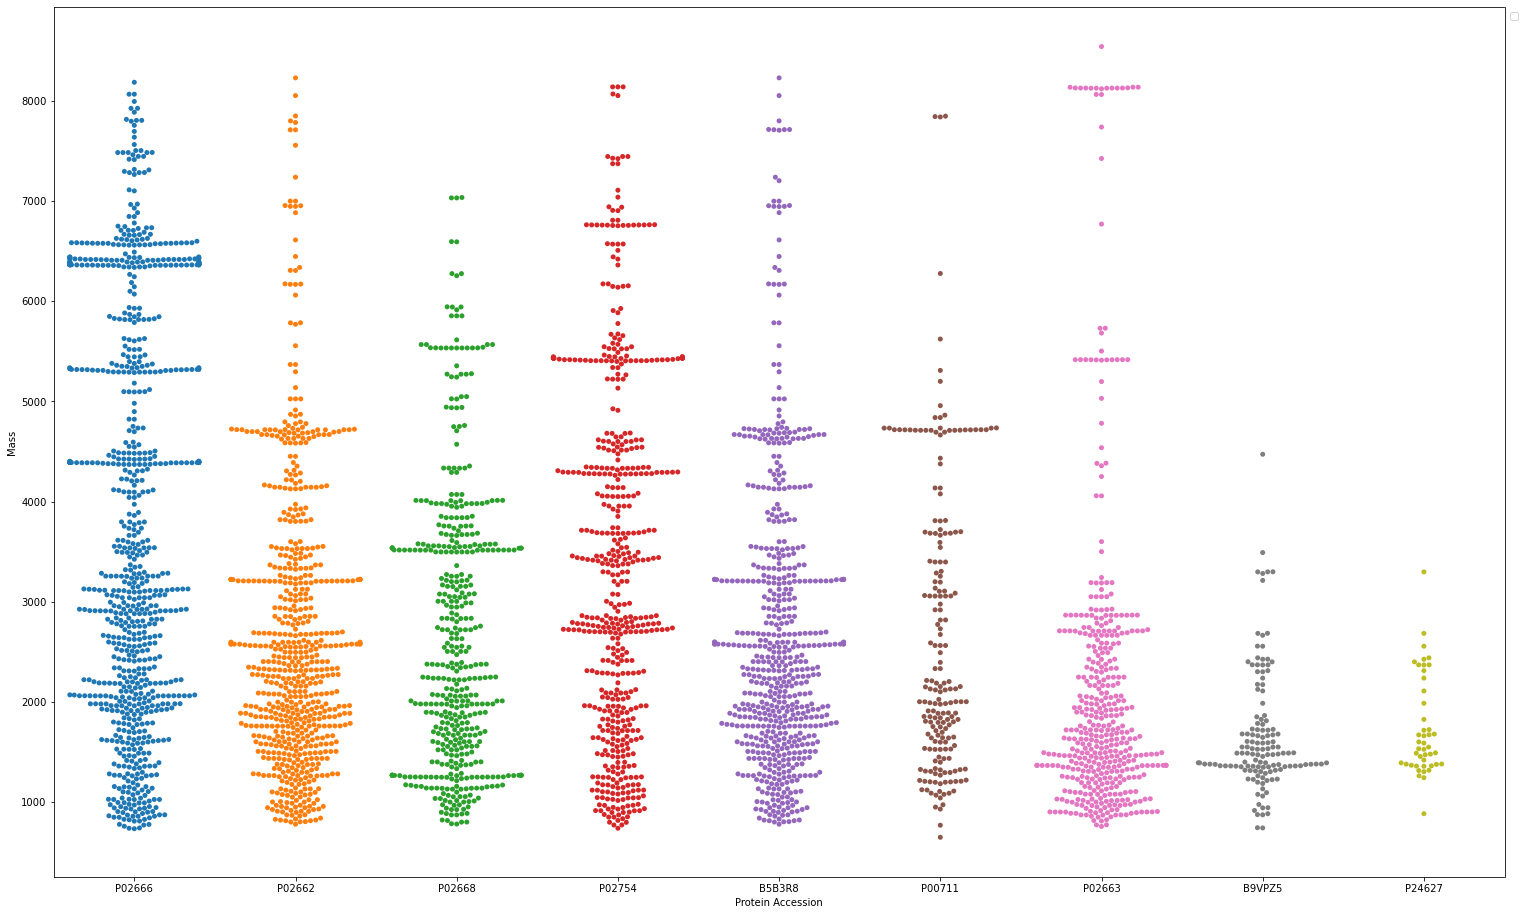

In [20]:
df_melt = [["Protein Accession", "Mass"]]
df2 = df[:4000]
plt.figure(figsize=(26,16))
sns.swarmplot(x='Protein Accession', y='Mass', data=df2 )
# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

<AxesSubplot:xlabel='Protein Accession', ylabel='Length'>

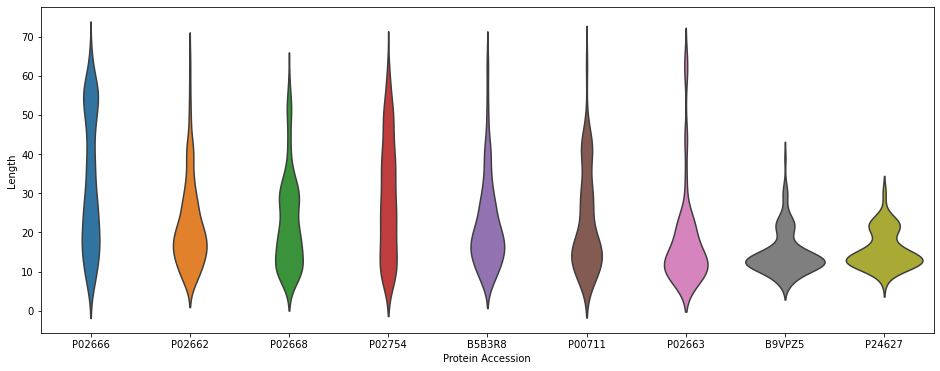

In [21]:
plt.figure(figsize=(16,6))
sns.violinplot(x='Protein Accession', y='Length', data=df2,
               inner=None) # Remove the bars inside the violins)

Text(0, 0.5, 'Count')

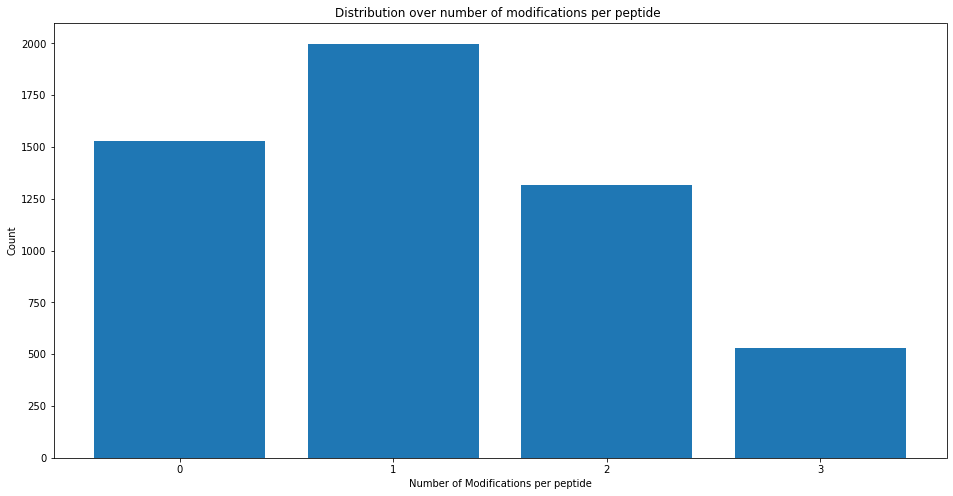

In [22]:
#Column chart (a.k.a. Bar Chart) showing distribution of modifications per peptide
plt.figure(figsize=(16,8))
plt.bar(df['#modifications'].value_counts().index, df['#modifications'].value_counts())
plt.xticks(np.arange(0,4))
plt.title("Distribution over number of modifications per peptide ")
plt.xlabel('Number of Modifications per peptide')
plt.ylabel('Count')

In [91]:
modifications = df["PTM"]
differentModifications = {}
for x in modifications:
    if pd.isnull(x):
        continue
    x = x.strip()
    mods = x.split(";")
    for mod in mods:
        if mod not in differentModifications:
            differentModifications[mod] = 1
        else:
            differentModifications[mod] +=1
for mod, count in differentModifications.items():
    print("mod is "+mod+" count is "+str(count))

mod is Oxidation (M) count is 212
mod is Deamidation (NQ) count is 1308
mod is  lal count is 379
mod is  Oxidation (M) count is 238
mod is Phosphorylation (STY) count is 667
mod is  Deamidation (NQ) count is 538
mod is lal count is 319
mod is  Phosphorylation (STY) count is 344
mod is Lactosylation count is 371
mod is Pyro-glu from Q count is 138
mod is  Dioxidation (M) count is 137
mod is Glycosylation type e count is 32
mod is  Lactosylation count is 277
mod is Dioxidation (M) count is 48
mod is Glycosylation type b count is 53
mod is  Glycosylation type c/d count is 44
mod is Glycosylation type c/d count is 25
mod is  Glycosylation type a count is 85
mod is  Glycosylation type b count is 77
mod is Glycosylation type a count is 112
mod is  Glycosylation type e count is 34
mod is lan count is 55
mod is Carbamidomethylation count is 506
mod is  Carbamidomethylation count is 183
mod is  lan count is 41


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

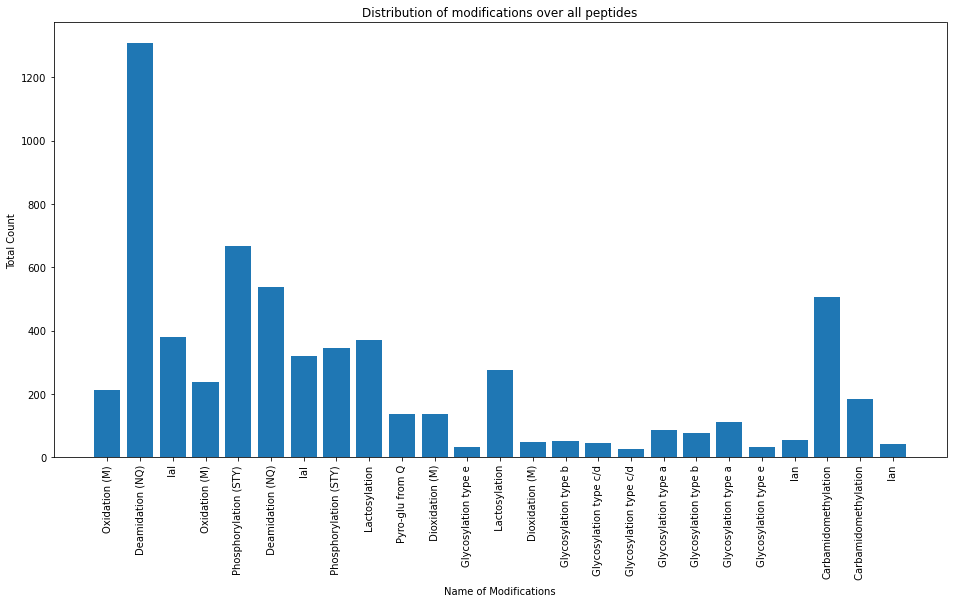

In [47]:
#Column chart (a.k.a. Bar Chart) showing distribution of modifications per peptide
plt.figure(figsize=(16,8))
plt.bar(differentModifications.keys(), differentModifications.values())
plt.title("Distribution of modifications over all proteins")
plt.xlabel('Name of Modifications')
plt.ylabel('Total Count')
plt.xticks(rotation='vertical')

In [148]:
modificationsAndProteins = df[["PTM", "Protein ID"]]
differentModificationsByProtein = {}
for x, proteinId in modificationsAndProteins.itertuples(index=False):
    if pd.isnull(x):
        continue
    if proteinId not in differentModificationsByProtein:
        differentModificationsByProtein[proteinId] = {}
    mods = x.split(";")
    for mod in mods:
        if mod not in differentModificationsByProtein[proteinId]:
             differentModificationsByProtein[proteinId][mod] = 1
        else:
             differentModificationsByProtein[proteinId][mod] += 1
for protein, mods in differentModificationsByProtein.items():
    for mod, count in mods.items():
        print("protein is: " +str(protein)+ "mod is "+mod+" count is "+str(count))

protein is: 10mod is Oxidation (M) count is 50
protein is: 10mod is Deamidation (NQ) count is 210
protein is: 10mod is  lal count is 78
protein is: 10mod is  Oxidation (M) count is 74
protein is: 10mod is Phosphorylation (STY) count is 119
protein is: 10mod is  Deamidation (NQ) count is 127
protein is: 10mod is lal count is 83
protein is: 10mod is  Phosphorylation (STY) count is 68
protein is: 10mod is Lactosylation count is 48
protein is: 10mod is Pyro-glu from Q count is 32
protein is: 10mod is  Dioxidation (M) count is 47
protein is: 10mod is Glycosylation type e count is 8
protein is: 10mod is  Lactosylation count is 75
protein is: 10mod is Dioxidation (M) count is 17
protein is: 10mod is Glycosylation type b count is 21
protein is: 10mod is  Glycosylation type c/d count is 9
protein is: 10mod is Glycosylation type c/d count is 7
protein is: 10mod is  Glycosylation type a count is 24
protein is: 10mod is  Glycosylation type b count is 11
protein is: 10mod is Glycosylation type a co

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

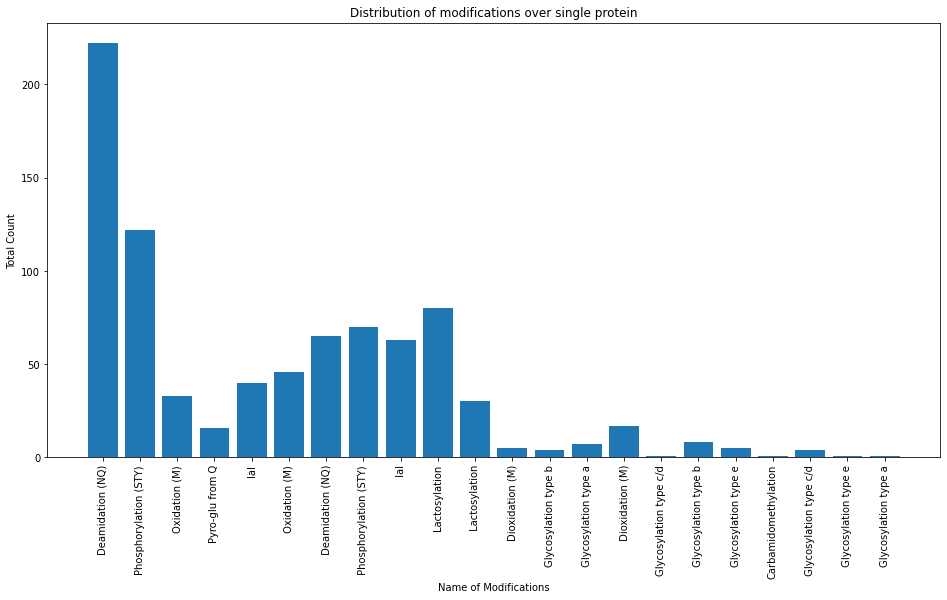

In [154]:
plt.figure(figsize=(16,8))
plt.bar(differentModificationsByProtein[1].keys(), differentModificationsByProtein[1].values())
plt.title("Distribution of modifications over single protein")
plt.xlabel('Name of Modifications')
plt.ylabel('Total Count')
plt.xticks(rotation='vertical')

In [156]:
piv = pd.pivot_table(df, values='-10lgP', index='RT', columns='#modifications')
print(piv.shape)
print(differentModificationsByProtein.shape)

(2788, 4)


AttributeError: 'dict' object has no attribute 'shape'